# Generating Multivariate Polynomial feature matrix

In [1]:
from itertools import combinations_with_replacement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


In [2]:
fname = './fods_1.csv'
# load the data
df = pd.read_csv(fname, header=0, encoding='UTF8')


In [3]:
# tranform data into x1,x2,x1^2,x1x2,x2^2,x1^3,x1^2x2,x1x2^2,x2^3,..... depending on power
def transform_data(X,degree):  
    matrix = np.ones((len(X), 1))
    
    for j in range(degree+1):
        matrix = np.c_[matrix, (X['MLOGP']**(degree - j))*(X['RDCHI']**j)]
    # print(matrix)

    return matrix
# errors


def predict(X, theta):
    return (X.dot((theta)))


def r_squared(X, y, final_weights):
    y_predict = predict(X, final_weights)
    return ((np.sum(np.square(y_predict-y.mean())))/(np.sum(np.square(y-y.mean()))))


def rmse(X, y, final_weights):
    y_predict = predict(X, final_weights)
    return (np.sqrt(np.square(y_predict-y).mean()))




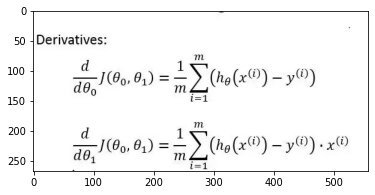

In [4]:
# read image
def read_image(fname):
    img = plt.imread(fname)
    plt.imshow(img)
    plt.show()

    # return img
read_image('img.jpg')


In [5]:
# training error
def train_error(X, y, theta):
    y_predict = predict(X, theta)
    return np.sum(np.square(y_predict-y))

In [6]:
def cost1(X, y, theta):
    n = len(X)
    # y = y.reshape(-1, 1)
    return np.sum((np.dot(X, theta) - y)**2) / (2 * n)


In [7]:

def rmse(X, y, final_weights):
    return (np.sqrt(np.square(predict(X, final_weights)-y).mean()))


In [8]:

def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    m=len(X)
    for i in range(iterations):

        delta = np.dot(X.T, (np.dot(X, theta) - y))
        theta = theta - (learning_rate * delta) / m
        cost_history[i] = cost1(X, y, theta)

    return theta, cost_history

In [9]:
y=df.iloc[:,2:3]
y = y.to_numpy()
y[0:5]

array([[3.74 ],
       [4.33 ],
       [7.019],
       [6.723],
       [5.979]])

In [10]:
order=[]
for i in range(len(y)):
    order.append(i)

shuffle = random.sample(order, int(len(order) * 0.8))

rem = [i for i in order if i not in shuffle]

In [11]:
theta_list = []
training_errors = []
test_errors = []
rmse_train = []
rmse_test = []

for i in range(0,10):
    error =[]
    print("degree of polynomial regression", i)
    
    # shuffle the data
    data = df
    train_data = data[shuffle[0]:]

    test_data = data[rem[0]:]
    # normalize training and testing data
    train_data_norm = (train_data - train_data.min()) / (train_data.max()-train_data.min())
    test_data_norm = (test_data - test_data.min()) / (test_data.max()-test_data.min())
    X_train = train_data_norm[['MLOGP', 'RDCHI']]
    X_test = test_data_norm[['MLOGP', 'RDCHI']]

    
    
    X_train = transform_data(X_train,i)#train_data_norm is wrong
    y_train = train_data_norm.iloc[:, 2:3]
    X_test = transform_data(X_test,i)

    y_test = test_data_norm.iloc[:, 2:3].to_numpy()
    X2 = np.ones((len(X_train), 1))
    X_train=np.c_[X_train,X2]
    theta = np.zeros((X_train.shape[1], 1))

    alpha = 0.001
    num_iters = 10**3
    theta, J_history = gradient_descent(X_train,y_train, theta, alpha, num_iters)
    # print(theta)
    theta_list.append(theta)
    training_errors.append( cost1(X_train, y_train, theta))  
    
    X2 = np.ones((len(X_test), 1))
    X_test=np.c_[X_test,X2]
    rmse_train.append(rmse(X_train, y_train, theta))
    print("rmse training error ", rmse(X_train, y_train, theta))
    rmse_test.append(rmse(X_test, y_test, theta))
    print("rmse testing error ", rmse(X_test, y_test, theta))
    test_errors.append( cost1(X_test, y_test, theta))


degree of polynomial regression 0
rmse training error  quantitative response of LC50    0.171527
dtype: float64
rmse testing error  0.16827830372991212
degree of polynomial regression 1
rmse training error  quantitative response of LC50    0.162094
dtype: float64
rmse testing error  0.15883021572393605
degree of polynomial regression 2
rmse training error  quantitative response of LC50    0.164527
dtype: float64
rmse testing error  0.1616406537292534
degree of polynomial regression 3
rmse training error  quantitative response of LC50    0.16885
dtype: float64
rmse testing error  0.1651851068877936
degree of polynomial regression 4
rmse training error  quantitative response of LC50    0.172564
dtype: float64
rmse testing error  0.16759325376894416
degree of polynomial regression 5
rmse training error  quantitative response of LC50    0.175315
dtype: float64
rmse testing error  0.16904461359914644
degree of polynomial regression 6
rmse training error  quantitative response of LC50    0.1

# Errors


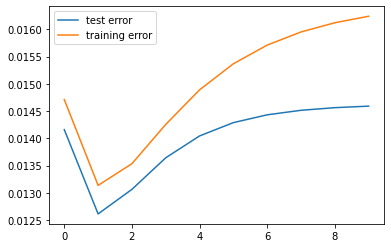

In [12]:
plt.plot(test_errors)
plt.plot(training_errors)
plt.legend(['test error', 'training error'])
plt.show()


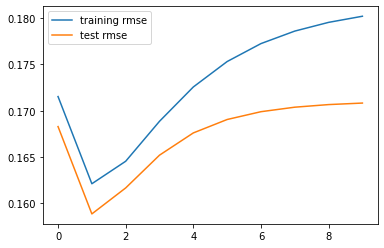

In [13]:
# calculate rmse and r square
plt.plot(rmse_train)
plt.plot(rmse_test)
plt.legend(['training rmse', 'test rmse'])
plt.show()


# Regularization


In [14]:
y=df.iloc[:,2:3]
y = y.to_numpy()
y[0:5]

array([[3.74 ],
       [4.33 ],
       [7.019],
       [6.723],
       [5.979]])

In [15]:
order=[]
for i in range(len(y)):
    order.append(i)

shuffle = random.sample(order, int(len(order) * 0.8))

rem = [i for i in order if i not in shuffle]

In [16]:
def transform_data1(X,degree):  
    matrix = np.ones((len(X), 1))
    for j in range(degree+1):
        matrix =  (X['MLOGP']**(degree - j))*(X['RDCHI']**j)

    return matrix

In [17]:
def cost(X, y, theta, lambda_, q):
    n = len(X)
    return np.sum((np.dot(X, theta) - y)**2) / (2 * n) + (lambda_/(2*n))*np.sum(np.abs(theta)**q)


In [18]:
# regularisation
def gradient_descent_with_regularisation(data, theta, learning_rate, iterations, lambda_, q):
    X = data[:,0:-1]
    y = data[:,-1].reshape(-1, 1)
    cost_history = np.zeros(iterations)

    for i in range(iterations):

        delta = np.dot(X.T, (np.dot(X, theta) - y))
        if q>1:
            theta = theta - ((learning_rate/len(X))*delta+(1/2)*lambda_*q*np.power(theta,q-1))
        elif q==1:
            a=0
            for j in range(len(theta)):
                if theta[j]>0:
                    a+=1
                elif theta[j]<0:
                    a-=1
                else:
                    a+=0
            theta = theta - ((learning_rate/len(X))*delta+(1/2)*lambda_*q*a)
        else :
            a=0
            for j in range(len(theta)):
                if theta[j]>0 :
                    a+=lambda_*np.power(np.absolute(theta),-0.5)/4
                elif theta[j]<0:
                    a-=lambda_*np.power(np.absolute(theta),-0.5)/4
                else:
                    a+=0
            theta = theta - ((learning_rate/len(X))*delta+(1/2)*lambda_*q*a)


        cost_history[i] = cost(X, y, theta, lambda_, q)
    return theta, cost_history


In [19]:
training_regu_rmse_error = []
test_regu_rmse_error = []
training_regu_r2_error = []
test_regu_r2_error = []
for j in [0.5, 1, 2, 4]:
    print("Regularization with q=",j)
    error_train=[]
    error_test=[]
    l1=[]
    l2=[]
    for k in [0,-20,-15,-10,-4,1]:
        X = np.ones((len(y), 1))
        
        data = np.c_[X, y]
        
        train_set = data[shuffle,:]
        test_set = data[rem, :]
        
        # initialize theta
        theta = np.zeros((X.shape[1], 1))# weights for training data
        lambd = 2**k
        alpha1= 0.001
        num_iters1 = 10**4
        theta, J_history = gradient_descent_with_regularisation(
            train_set, theta, alpha1, num_iters1, lambd, j)
        # calculating errors
        error_train.append(rmse(train_set[:,0:-1],train_set[:,-1].reshape(-1, 1), theta))
        error_test.append(rmse(test_set[:,0:-1],test_set[:,-1].reshape(-1, 1), theta))
    training_regu_rmse_error.append(error_train)
    test_regu_rmse_error.append(error_test)
    error_train=[]
    error_test=[]


Regularization with q= 0.5
Regularization with q= 1
Regularization with q= 2
Regularization with q= 4


In [20]:
print("training rmse error")
i=0
for q in [0.5,1,2,4]:
    print("q=",q)
    print(training_regu_rmse_error[i])
    i+=1

training rmse error
q= 0.5
[4.794445926308343, 1.63541120591777, 1.6354112059212256, 1.6354112096946591, 1.6394625584719125, 2.3390413842353794]
q= 1
[5.213699853876244, 1.6354113363563196, 1.635484331705104, 1.7068013655089544, 4.910485160791195, 5.795830049204357]
q= 2
[4.902348740665122, 1.6354177025118959, 1.64115176919444, 2.810468903627795, 4.838079749809975, 55.31751775990003]
q= 4
[4.783404969807321, 1.644116995389725, 2.3120999413383014, 3.791578222381427, 4.6013313901249395, 4.808614533076827]


In [21]:
print("testing rmse error")
i=0
for q in [0.5,1,2,4]:
    print("q=",q)
    print(test_regu_rmse_error[i])
    i+=1
    

testing rmse error
q= 0.5
[4.989905687287883, 1.772816978621897, 1.772816981069102, 1.772819487228554, 1.7868942698637988, 2.5446474019984375]
q= 1
[5.407151076439179, 1.77286019146481, 1.7742628259475157, 1.8809413329557743, 5.1053703611183305, 5.98678976937841]
q= 2
[5.09727375988436, 1.7732210756030717, 1.7904106346756732, 3.016520652050128, 5.033321775945153, 55.48165796163731]
q= 4
[4.978920147570047, 1.7959702807236808, 2.517494504401511, 3.9925508120808035, 4.797779103198666, 5.004003369393608]
